Download MIT_BIG Database from `wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/`

Using Python 3.12.4

In [55]:
import wfdb
import os
from glob import glob
import matplotlib.pyplot as plt
from wfdb import processing
import numpy as np

In [56]:
def fetch_records(record_name, directory):
    record_details = os.path.join(directory, record_name)
    record = wfdb.rdrecord(record_details, physical=True, sampfrom=0)
    attributes = wfdb.rdann(record_details, extension='atr', sampto=0)

    return record, attributes

In [57]:
directory = '../files/mitdb/1.0.0'
data = {}

records = [os.path.basename(file).split('.')[0] for file in glob(os.path.join(directory, '*.dat'))]

for record_detail in records:
    record, attributes = fetch_records(record_name=record_detail, directory=directory)
    data[record_detail] =  {
            "record" : record,
            "attribute": attributes
        }

print(data)

{'100': {'record': <wfdb.io.record.Record object at 0x0000018419A30B90>, 'attribute': <wfdb.io.annotation.Annotation object at 0x0000018419A805F0>}, '101': {'record': <wfdb.io.record.Record object at 0x0000018419D11D30>, 'attribute': <wfdb.io.annotation.Annotation object at 0x000001841B4F04D0>}, '102': {'record': <wfdb.io.record.Record object at 0x000001841B4F12E0>, 'attribute': <wfdb.io.annotation.Annotation object at 0x000001841B4F3950>}, '103': {'record': <wfdb.io.record.Record object at 0x0000018419D6AA80>, 'attribute': <wfdb.io.annotation.Annotation object at 0x0000018419A155B0>}, '104': {'record': <wfdb.io.record.Record object at 0x000001841B59E7B0>, 'attribute': <wfdb.io.annotation.Annotation object at 0x000001841B52F0E0>}, '105': {'record': <wfdb.io.record.Record object at 0x000001841B52CC80>, 'attribute': <wfdb.io.annotation.Annotation object at 0x000001841B52C050>}, '106': {'record': <wfdb.io.record.Record object at 0x000001841B52CAA0>, 'attribute': <wfdb.io.annotation.Annota

In [58]:
print(records)

['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [59]:
for file in glob(os.path.join(directory, '*.dat')):
    print(file)

../files/mitdb/1.0.0\100.dat
../files/mitdb/1.0.0\101.dat
../files/mitdb/1.0.0\102.dat
../files/mitdb/1.0.0\103.dat
../files/mitdb/1.0.0\104.dat
../files/mitdb/1.0.0\105.dat
../files/mitdb/1.0.0\106.dat
../files/mitdb/1.0.0\107.dat
../files/mitdb/1.0.0\108.dat
../files/mitdb/1.0.0\109.dat
../files/mitdb/1.0.0\111.dat
../files/mitdb/1.0.0\112.dat
../files/mitdb/1.0.0\113.dat
../files/mitdb/1.0.0\114.dat
../files/mitdb/1.0.0\115.dat
../files/mitdb/1.0.0\116.dat
../files/mitdb/1.0.0\117.dat
../files/mitdb/1.0.0\118.dat
../files/mitdb/1.0.0\119.dat
../files/mitdb/1.0.0\121.dat
../files/mitdb/1.0.0\122.dat
../files/mitdb/1.0.0\123.dat
../files/mitdb/1.0.0\124.dat
../files/mitdb/1.0.0\200.dat
../files/mitdb/1.0.0\201.dat
../files/mitdb/1.0.0\202.dat
../files/mitdb/1.0.0\203.dat
../files/mitdb/1.0.0\205.dat
../files/mitdb/1.0.0\207.dat
../files/mitdb/1.0.0\208.dat
../files/mitdb/1.0.0\209.dat
../files/mitdb/1.0.0\210.dat
../files/mitdb/1.0.0\212.dat
../files/mitdb/1.0.0\213.dat
../files/mitdb

A record can have the following records:

> * p_signal: The physical (float) signal values if physical=True
> * d_signal: The digital (integer) signal values if physical=False
> * fs: Sampling frequency
> * sig_len: Signal length
> * n_sig: Number of signals
> * sig_name: List of signal names
> * units: List of signal units
> * Other metadata like base_date, base_time, etc.

attributes have the following records:

> * sample: An Nx1 integer vector containing the annotation locations in samples relative to the beginning of the record.
> * symbol: An Nx1 character vector describing the annotation types (e.g., 'N' for normal beat, 'V' for premature ventricular contraction, etc.).
> * subtype: An Nx1 integer vector describing annotation subtypes.
> * chan: An Nx1 integer vector indicating the channel associated with each annotation.
> * num: An Nx1 integer vector containing the annotation numbers.
> * aux_note: An Nx1 cell array of strings containing auxiliary information for each annotation.
> * fs: The sampling frequency of the record (if available).


In [60]:
data['100']['attribute'].sample

array([    18,     77,    370, ..., 649484, 649734, 649991], dtype=int64)

In [89]:
record_num = '201'

In [90]:
signals = data[record_num]['record'].p_signal.T
labels = data[record_num]['attribute'].symbol
fs = data[record_num]['record'].fs

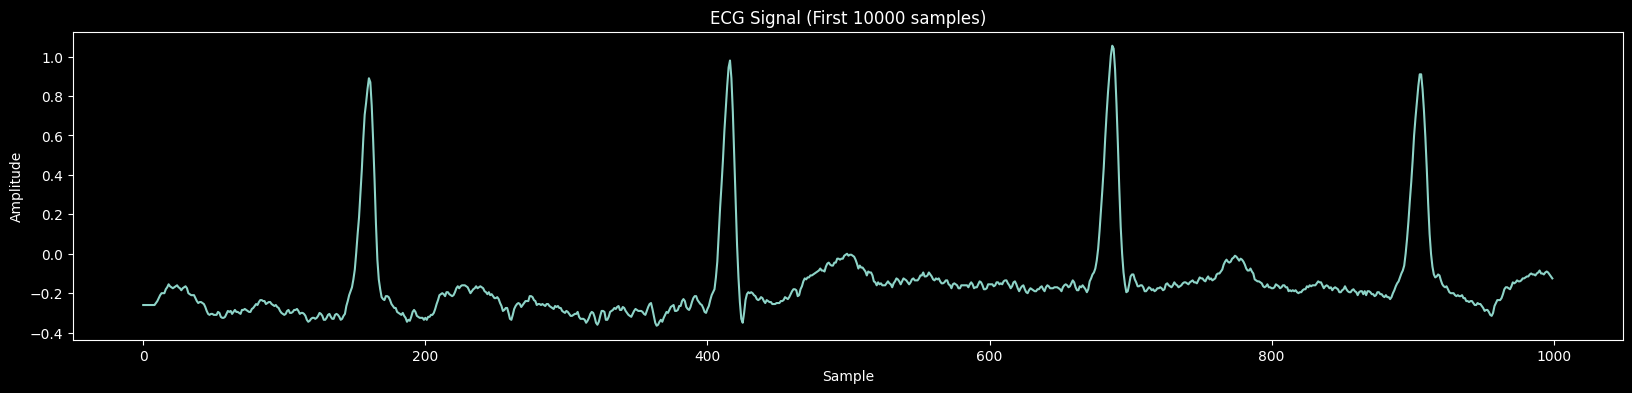

In [91]:
plt.figure(figsize=(20,4))
plt.plot(signals[0][:1000])
plt.title('ECG Signal (First 10000 samples)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [92]:
r_peaks = processing.xqrs_detect(sig=signals[0], fs=fs)

beats = []
for i in range(len(r_peaks)-1):
    beats.append(signals[0][r_peaks[i]:r_peaks[i+1]])

print(beats)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
[array([ 0.835,  0.89 ,  0.87 ,  0.75 ,  0.575,  0.375,  0.15 , -0.03 ,
       -0.13 , -0.18 , -0.22 , -0.23 , -0.235, -0.215, -0.215, -0.22 ,
       -0.235, -0.255, -0.265, -0.275, -0.275, -0.295, -0.3  , -0.305,
       -0.31 , -0.3  , -0.315, -0.325, -0.345, -0.335, -0.34 , -0.32 ,
       -0.295, -0.285, -0.295, -0.315, -0.32 , -0.325, -0.325, -0.325,
       -0.335, -0.325, -0.335, -0.32 , -0.32 , -0.31 , -0.31 , -0.3  ,
       -0.28 , -0.255, -0.235, -0.21 , -0.205, -0.2  , -0.205, -0.215,
       -0.195, -0.195, -0.205, -0.21 , -0.215, -0.21 , -0.195, -0.175,
       -0.165, -0.175, -0.165, -0.16 , -0.16 , -0.16 , -0.165, -0.17 ,
       -0.185, -0.2  , -0.19 , -0.18 , -0.175, -0.165, -0.175, -0.17 ,
       -0.165, -0.17 , -0.175, -0.19 , -0.195, -0.205, -0.195, -0.21 ,
       -0.205, -0.215, -0.225, -0.225, -0.22 , -0.23 , -0.25 ,

In [93]:
# Extract features from a single beat
def extract_features(beat):
    # Time domain
    mean = np.mean(beat)
    std = np.std(beat)
    
    # Frequency domain
    fft = np.fft.fft(beat)
    power = np.abs(fft)**2
    freq = np.fft.fftfreq(len(beat))
    
    dominant_freq = freq[np.argmax(power)]
    
    return [mean, std, dominant_freq]

features = [extract_features(beat) for beat in beats]

print(features)

[[-0.21933593750000002, 0.2042802447521446, 0.0], [-0.1092250922509225, 0.18751666365679806, 0.0], [-0.09305936073059362, 0.22309262802077728, 0.0], [-0.15375, 0.1966545126844409, 0.0], [-0.14201716738197426, 0.20696407529000244, 0.0], [-0.1508542713567839, 0.21435898099452655, 0.0], [-0.23220930232558137, 0.16378091693074637, 0.0], [-0.19885608856088563, 0.18226025943064625, 0.0], [-0.2068339768339768, 0.18652951013336752, 0.0], [-0.2081637168141593, 0.19181380331901932, 0.0], [-0.21739316239316242, 0.2001560270562002, 0.0], [-0.19743801652892562, 0.20869786744731625, 0.0], [-0.20071428571428573, 0.1717901406754212, 0.0], [-0.20001519756838904, 0.17870460015214626, 0.0], [-0.2076774193548387, 0.1709662081489326, 0.0], [-0.20315573770491804, 0.20222451491916565, 0.0], [-0.2238025210084033, 0.19422582497207083, 0.0], [-0.24876953124999995, 0.19692744740234985, 0.0], [-0.18197183098591546, 0.24787544985965507, 0.0], [-0.2295905172413793, 0.2104621976370465, 0.0], [-0.23169260700389102, 0

In [94]:
# Map AAMI heartbeat types
aami_mapping = {'N':'N', 'L':'N', 'R':'N', 'e':'N', 'j':'N',
                'A':'S', 'a':'S', 'J':'S', 'S':'S',
                'V':'V', 'E':'V',
                'F':'F',
                '/':'Q', 'f':'Q', 'Q':'Q'}

aami_labels = [aami_mapping.get(label, 'Q') for label in labels]

In [95]:
aami_labels

['Q',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'S',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [96]:
# QRS detection
qrs_inds = processing.gqrs_detect(sig=signals[0], fs=record.fs)

qrs_inds

array([   147,    402,    674, ..., 648582, 649092, 649799])

In [97]:
# %pip install PyWavelets

In [98]:
import pywt

# Wavelet decomposition
coeffs = pywt.wavedec(signals[0], 'db4', level=4)

coeffs

[array([-1.04147434, -1.03989602, -1.04063618, ..., -0.66247335,
        -0.65306421, -0.28926212]),
 array([ 3.19982298e-05,  2.26847794e-04,  5.19650174e-03, ...,
        -3.16369486e-02, -9.92480675e-02,  3.45445324e-02]),
 array([ 2.09841959e-05,  4.14312606e-05,  2.75553956e-03, ...,
        -1.05412307e-02,  5.27035064e-02, -6.33477415e-03]),
 array([-2.82245765e-06,  4.38017678e-17, -2.12867972e-04, ...,
        -1.92059547e-01,  2.80735793e-02,  3.52949979e-03]),
 array([-3.90312782e-18, -3.90312782e-18, -3.90312782e-18, ...,
         1.66301921e-02,  3.18341950e-02,  7.30721629e-04])]

In [99]:
signals.shape

(2, 650000)

In [100]:
from scipy import signal

# Power spectral density
f, Pxx = signal.welch(signals[1], fs=record.fs)

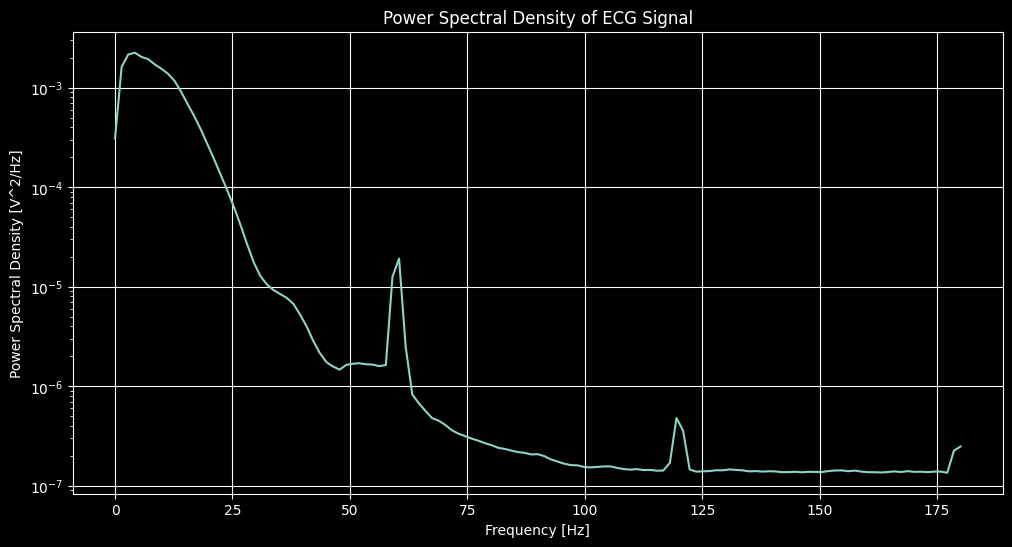

In [101]:
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')
plt.title('Power Spectral Density of ECG Signal')
plt.grid(True)
plt.show()